In [ ]:
#### Connecting to the Google Drive
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [ ]:
# importing libraries
import pandas as pd
import numpy as np

# pass in column names for each CSV as the column name is not given in the file and read them using pandas.
# You can check the column names from the readme file

# reading users file:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('My Drive/ml-100k/ml-100k/u.user', sep='|', names=u_cols,encoding='latin-1')

# reading ratings file:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('My Drive/ml-100k/ml-100k/u.data', sep='\t', names=r_cols,encoding='latin-1')

# reading items file:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('My Drive/ml-100k/ml-100k/u.item', sep='|', names=i_cols,
encoding='latin-1')

# After loading the dataset, we should look at the content of each file (users, ratings, items).

# Looking at the user file
print("\nUser Data :")
print("shape : ", users.shape)
print(users.head())

# We have 943 users in the dataset and each user has 5 features, i.e. user_ID, age, sex, occupation and zip_code. Now let’s look at the ratings file.

# Ratings Data
print("\nRatings Data :")
print("shape : ", ratings.shape)
print(ratings.head())

# We have 100k ratings for different user and movie combinations. Now finally examine the items file.

# Item Data
print("\nItem Data :")
print("shape : ", items.shape)
print(items.head())


User Data :
shape :  (943, 5)
   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213

Ratings Data :
shape :  (100000, 4)
   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596

Item Data :
shape :  (1682, 24)
   movie id        movie title release date  ...  Thriller War  Western
0         1   Toy Story (1995)  01-Jan-1995  ...         0   0        0
1         2   GoldenEye (1995)  01-Jan-1995  ...         1   0        0
2         3  Four Rooms (1995)  01-Jan-1995  ...         1   0        0
3         4  Get Shorty (1995)  01-Jan-1995  ...         0   0        0
4         5     Copycat

In [ ]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_train = pd.read_csv('My Drive/ml-100k/ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv('My Drive/ml-100k/ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')
ratings_train.shape, ratings_test.shape

((90570, 4), (9430, 4))

Building the Collaborative Filtering from scratch

In [ ]:
n_users = ratings.user_id.unique().shape[0]
n_items = ratings.movie_id.unique().shape[0]

In [ ]:
data_matrix = np.zeros((n_users, n_items))
for line in ratings.itertuples():
    data_matrix[line[1]-1, line[2]-1] = line[3]

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(data_matrix, metric='cosine')
item_similarity = pairwise_distances(data_matrix.T, metric='cosine')

In [ ]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #We use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [ ]:
user_prediction = predict(data_matrix, user_similarity, type='user')
item_prediction = predict(data_matrix, item_similarity, type='item')

In [ ]:
!pip install turicreate
import turicreate

     |████████████████████████████████| 92.0 MB 16 kB/s 
     |████████████████████████████████| 322 kB 45.5 MB/s 
     |████████████████████████████████| 86.4 MB 87 kB/s 
     |████████████████████████████████| 3.5 MB 30.3 MB/s 
     |████████████████████████████████| 3.6 MB 36.2 MB/s 
     |████████████████████████████████| 18.3 MB 17.9 MB/s 
     |████████████████████████████████| 449 kB 43.5 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 3.8 MB 45.0 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 2.9 MB 35.3 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=acf8be8346afbdbf6bc3b088ff685ec4ce8e11876650018001ab776eaa7986d4
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320860 sha256=ddaa6c519e

In [ ]:
train_data = turicreate.SFrame(ratings_train)
test_data = turicreate.SFrame(ratings_test)

In [ ]:
popularity_model = turicreate.popularity_recommender.create(train_data, user_id='user_id', item_id='movie_id', target='rating')

Warning: Ignoring columns unix_timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 90570 observations with 943 users and 1680 items.

Data prepared in: 0.087086s

90570 observations to process; with 1680 unique items.

In [ ]:
popularity_recomm = popularity_model.recommend(users=[1,2,3,4,5],k=5)
popularity_recomm.print_rows(num_rows=25)

+---------+----------+-------+------+
| user_id | movie_id | score | rank |
+---------+----------+-------+------+
|    1    |   1599   |  5.0  |  1   |
|    1    |   1201   |  5.0  |  2   |
|    1    |   1189   |  5.0  |  3   |
|    1    |   1122   |  5.0  |  4   |
|    1    |   814    |  5.0  |  5   |
|    2    |   1599   |  5.0  |  1   |
|    2    |   1201   |  5.0  |  2   |
|    2    |   1189   |  5.0  |  3   |
|    2    |   1122   |  5.0  |  4   |
|    2    |   814    |  5.0  |  5   |
|    3    |   1599   |  5.0  |  1   |
|    3    |   1201   |  5.0  |  2   |
|    3    |   1189   |  5.0  |  3   |
|    3    |   1122   |  5.0  |  4   |
|    3    |   814    |  5.0  |  5   |
|    4    |   1599   |  5.0  |  1   |
|    4    |   1201   |  5.0  |  2   |
|    4    |   1189   |  5.0  |  3   |
|    4    |   1122   |  5.0  |  4   |
|    4    |   814    |  5.0  |  5   |
|    5    |   1599   |  5.0  |  1   |
|    5    |   1201   |  5.0  |  2   |
|    5    |   1189   |  5.0  |  3   |
|    5    | 

In [ ]:
#Training the model
item_sim_model = turicreate.item_similarity_recommender.create(train_data, user_id='user_id', item_id='movie_id', target='rating', similarity_type='cosine')

#Making recommendations
item_sim_recomm = item_sim_model.recommend(users=[1,2,3,4,5],k=5)
item_sim_recomm.print_rows(num_rows=25)

Warning: Ignoring columns unix_timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 90570 observations with 943 users and 1680 items.

Data prepared in: 0.084442s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.664ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 10.296ms                            | 0.25             | 6               |

| 248.278ms                           | 100              | 1680            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.273s

+---------+----------+--------------------+------+
| user_id | movie_id |       score        | rank |
+---------+----------+--------------------+------+
|    1    |   423    | 0.9837323215626578 |  1   |
|    1    |   202    | 0.9539263359917939 |  2   |
|    1    |   655    | 0.8284266454572896 |  3   |
|    1    |   403    | 0.7833065265462599 |  4   |
|    1    |   385    | 0.7578652207633011 |  5   |
|    2    |    50    | 1.1256258487701416 |  1   |
|    2    |   181    | 1.0651773168490484 |  2   |
|    2    |   121    |  0.94162796323116  |  3   |
|    2    |    9     | 0.8518216059758112 |  4   |
|    2    |   117    | 0.7926051295720614 |  5   |
|    3    |   313    | 0.6353766620159149 |  1   |
|    3    |   328    | 0.6032880300825293 |  2   |
|    3    |   315    | 0.5422587123784152 |  3   |
|    3    |   331    | 0.5355071858926252 |  4   |
|    3    |   332    | 0.5316696112806146 |  5   |
|    4    |    50    | 1.1311477082116264 |  1   |
|    4    |   288    | 1.048715

In [ ]:
class MF():

    # Initializing the user-movie rating matrix, no. of latent features, alpha and beta.
    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    # Initializing user-feature and movie-feature matrix
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initializing the bias terms
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # List of training samples
        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
          for j in range(self.num_items)
            if self.R[i, j] > 0
        ]

        # Stochastic gradient descent for given number of iterations
        training_process = []
        for i in range(self.iterations):
          np.random.shuffle(self.samples)
          self.sgd()
          mse = self.mse()
          training_process.append((i, mse))
          if (i+1) % 20 == 0:
              print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    # Computing total mean squared error
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # Ratings for user i and moive j
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Full user-movie rating matrix
    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [ ]:
R= np.array(ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0))

In [ ]:
mf = MF(R, K=20, alpha=0.001, beta=0.01, iterations=100)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())
print()

Iteration: 20 ; error = 296.0980
Iteration: 40 ; error = 290.9928
Iteration: 60 ; error = 287.4710
Iteration: 80 ; error = 281.7528
Iteration: 100 ; error = 272.1707

P x Q:
[[3.9694892  3.32208473 3.15511828 ... 3.33209291 3.40596801 3.41084641]
 [3.96851287 3.33064271 3.0845689  ... 3.35980202 3.49664029 3.43937762]
 [3.34786681 2.65781615 2.59579554 ... 2.78292434 2.88353724 2.90478242]
 ...
 [4.22746697 3.62659608 3.39312493 ... 3.64202291 3.76755491 3.73944731]
 [4.35804171 3.74076418 3.51848112 ... 3.76178828 3.91991245 3.87262604]
 [3.9127816  3.23257695 3.05332509 ... 3.18667451 3.36131421 3.32901497]]



Building Item Based Collaborative Filtering Techniques

In [ ]:
import os
import pandas as pd
# configure file path

# read data
i_cols = ['movie id', 'movietitle']
df_movies =  items[i_cols]

r_cols = ['user_id', 'movie_id', 'rating']
df_ratings = ratings[r_cols]

KeyError: ignored

In [ ]:
df_movies.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie id     1682 non-null   int64 
 1   movie title  1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   100000 non-null  int64
 1   movie_id  100000 non-null  int64
 2   rating    100000 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [ ]:
df_ratings.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [ ]:
num_users = len(df_ratings.user_id.unique())
num_items = len(df_ratings.movie_id.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_items))

There are 943 unique users and 1682 unique movies in this data set


In [ ]:
# get count
df_ratings_cnt_tmp = pd.DataFrame(df_ratings.groupby('rating').size(), columns=['count'])
df_ratings_cnt_tmp

,count
rating,
1,6110
2,11370
3,27145
4,34174
5,21201


In [ ]:
# there are a lot more counts in rating of zero
total_cnt = num_users * num_items
rating_zero_cnt = total_cnt - df_ratings.shape[0]
# append counts of zero rating to df_ratings_cnt
df_ratings_cnt = df_ratings_cnt_tmp.append(
    pd.DataFrame({'count': rating_zero_cnt}, index=[0.0]),
    verify_integrity=True,
).sort_index()
df_ratings_cnt

,count
0.0,1486126
1.0,6110
2.0,11370
3.0,27145
4.0,34174
5.0,21201


In [ ]:
# add log count
df_ratings_cnt['log_count'] = np.log(df_ratings_cnt['count'])
df_ratings_cnt

,count,log_count
0.0,1486126,14.211683
1.0,6110,8.717682
2.0,11370,9.338734
3.0,27145,10.208948
4.0,34174,10.439220
5.0,21201,9.961804


Text(0, 0.5, 'number of ratings')

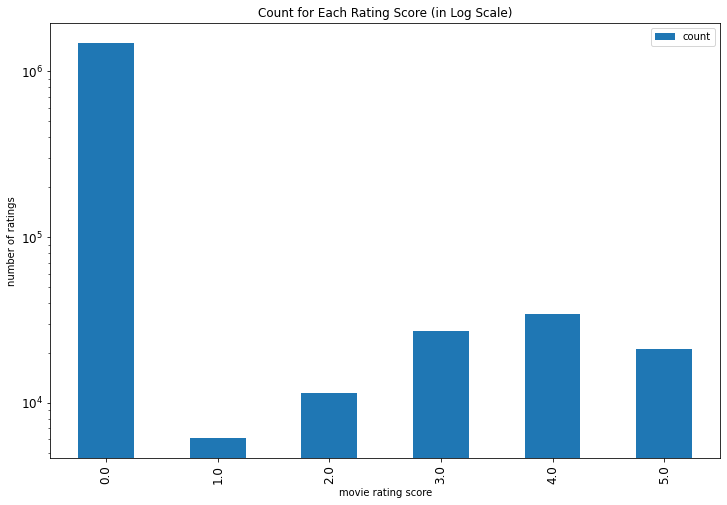

In [ ]:
ax = df_ratings_cnt[['count']].reset_index().rename(columns={'index': 'rating score'}).plot(
    x='rating score',
    y='count',
    kind='bar',
    figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    logy=True,
    fontsize=12,
)
ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

In [ ]:
# get rating frequency
df_movies_cnt = pd.DataFrame(df_ratings.groupby('movie_id').size(), columns=['count'])
df_movies_cnt.head()

,count
movie_id,
1,452
2,131
3,90
4,209
5,86


Text(0, 0.5, 'number of ratings')

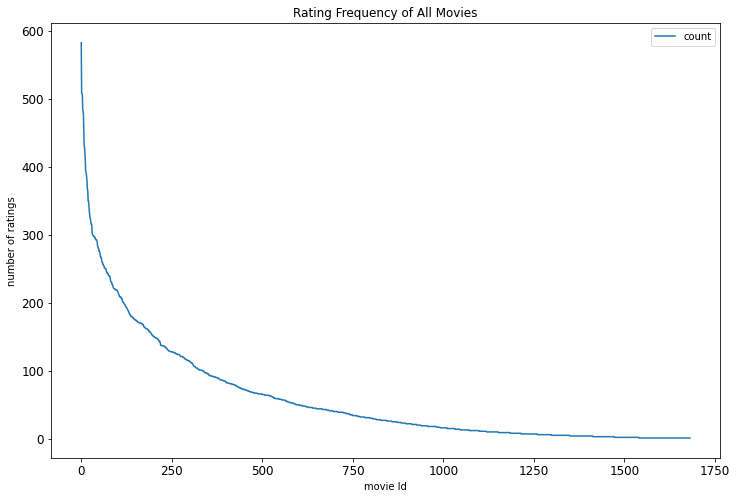

In [ ]:
# plot rating frequency of all movies
ax = df_movies_cnt \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

Text(0, 0.5, 'number of ratings (log scale)')

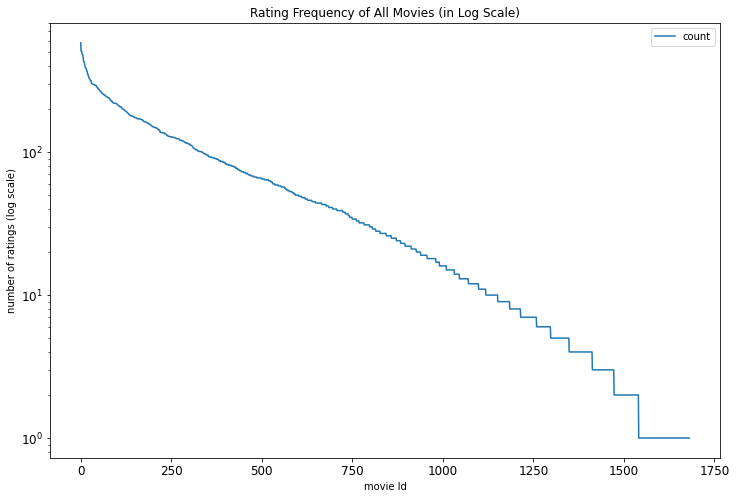

In [ ]:
# plot rating frequency of all movies in log scale
ax = df_movies_cnt \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies (in Log Scale)',
        fontsize=12,
        logy=True
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings (log scale)")

In [ ]:
df_movies_cnt['count'].quantile(np.arange(1, 0.6, -0.05))

1.00    583.00
0.95    229.85
0.90    169.00
0.85    127.85
0.80    100.00
0.75     80.00
0.70     65.00
0.65     51.65
Name: count, dtype: float64

In [ ]:
# filter data
popularity_thres = 50
popular_movies = list(set(df_movies_cnt.query('count >= @popularity_thres').index))
df_ratings_drop_movies = df_ratings[df_ratings.movie_id.isin(popular_movies)]
print('shape of original ratings data: ', df_ratings.shape)
print('shape of ratings data after dropping unpopular movies: ', df_ratings_drop_movies.shape)

shape of original ratings data:  (100000, 3)
shape of ratings data after dropping unpopular movies:  (83715, 3)


In [ ]:
# get number of ratings given by every user
df_users_cnt = pd.DataFrame(df_ratings_drop_movies.groupby('user_id').size(), columns=['count'])
df_users_cnt.head()

,count
user_id,
1,233
2,56
3,39
4,19
5,134


Text(0, 0.5, 'number of ratings')

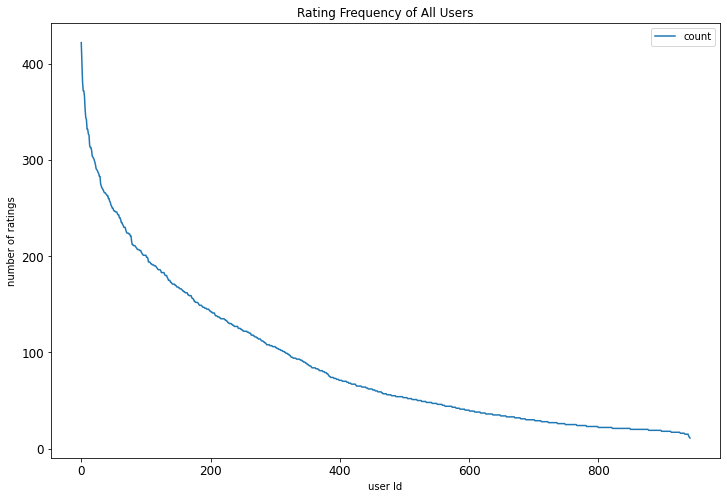

In [ ]:
# plot rating frequency of all movies
ax = df_users_cnt \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Users',
        fontsize=12
    )
ax.set_xlabel("user Id")
ax.set_ylabel("number of ratings")

In [ ]:
df_users_cnt['count'].quantile(np.arange(1, 0.5, -0.05))

1.00    422.0
0.95    251.8
0.90    202.8
0.85    171.0
0.80    147.0
0.75    128.0
0.70    111.0
0.65     94.0
0.60     79.2
0.55     67.0
Name: count, dtype: float64

In [ ]:
# filter data
ratings_thres = 50
active_users = list(set(df_users_cnt.query('count >= @ratings_thres').index))
df_ratings_drop_users = df_ratings_drop_movies[df_ratings_drop_movies.user_id.isin(active_users)]
print('shape of original ratings data: ', df_ratings.shape)
print('shape of ratings data after dropping both unpopular movies and inactive users: ', df_ratings_drop_users.shape)

shape of original ratings data:  (100000, 3)
shape of ratings data after dropping both unpopular movies and inactive users:  (71687, 3)


In [ ]:
df_movies = df_movies.rename(columns={'movie title':'movie_title'})

In [ ]:
df_movies.head()

,movie id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
# pivot and create movie-user matrix
movie_user_mat = df_ratings_drop_users.pivot(index='movie_id', columns='user_id', values='rating').fillna(0)
# create mapper from movie title to index
#df_movies.rename(columns={'movie title':'movie_title'})
movie_to_idx = {
    movie: i for i, movie in
    enumerate(list(df_movies.set_index('movie id').loc[movie_user_mat.index].movie_title))
}
# transform matrix to scipy sparse matrix
movie_user_mat_sparse = csr_matrix(movie_user_mat.values)

In [ ]:
%env JOBLIB_TEMP_FOLDER=/tmp
# define model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
# fit
model_knn.fit(movie_user_mat_sparse)

env: JOBLIB_TEMP_FOLDER=/tmp


NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
def fuzzy_matching(mapper, fav_movie, verbose=True):
    """
    return the closest match via fuzzy ratio. If no match found, return None

    Parameters
    ----------
    mapper: dict, map movie title name to index of the movie in data

    fav_movie: str, name of user input movie

    verbose: bool, print log if True

    Return
    ------
    index of the closest match
    """
    match_tuple = []
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_movie.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]



def make_recommendation(model_knn, data, mapper, fav_movie, n_recommendations):
    """
    return top n similar movie recommendations based on user's input movie


    Parameters
    ----------
    model_knn: sklearn model, knn model

    data: movie-user matrix

    mapper: dict, map movie title name to index of the movie in data

    fav_movie: str, name of user input movie

    n_recommendations: int, top n recommendations

    Return
    ------
    list of top n similar movie recommendations
    """
    # fit
    model_knn.fit(data)
    # get input movie index
    print('You have input movie:', fav_movie)
    idx = fuzzy_matching(mapper, fav_movie, verbose=True)
    # inference
    print('Recommendation system start to make inference')
    print('......\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)
    # get list of raw idx of recommendations
    raw_recommends = \
        sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(fav_movie))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))

In [ ]:
#!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

my_favorite = 'Top Gun (1986)'

make_recommendation(
    model_knn=model_knn,
    data=movie_user_mat_sparse,
    fav_movie=my_favorite,
    mapper=movie_to_idx,
    n_recommendations= 10)

You have input movie: Top Gun (1986)
Found possible matches in our database: ['Top Gun (1986)', 'Young Guns (1988)', 'Platoon (1986)', 'Bound (1996)', 'Tin Men (1987)', 'Giant (1956)', 'Cop Land (1997)', 'Trees Lounge (1996)', 'Notorious (1946)', 'Apt Pupil (1998)']

Recommendation system start to make inference
......

Recommendations for Top Gun (1986):
1: Empire Strikes Back, The (1980), with distance of 0.32214002791495144
2: Terminator, The (1984), with distance of 0.3215127728877679
3: Star Trek IV: The Voyage Home (1986), with distance of 0.3211673211994531
4: Raiders of the Lost Ark (1981), with distance of 0.3159095575968506
5: Back to the Future (1985), with distance of 0.31340959580694694
6: Batman (1989), with distance of 0.3091229462064913
7: Die Hard: With a Vengeance (1995), with distance of 0.3090045221317621
8: Speed (1994), with distance of 0.2750609321408167
9: True Lies (1994), with distance of 0.2733938224443916
10: Jurassic Park (1993), with distance of 0.25657206

In [ ]:
movie_to_idx

{'101 Dalmatians (1996)': 195,
 '12 Angry Men (1957)': 149,
 '2 Days in the Valley (1996)': 587,
 '20,000 Leagues Under the Sea (1954)': 114,
 '2001: A Space Odyssey (1968)': 109,
 '39 Steps, The (1935)': 454,
 'Absolute Power (1997)': 250,
 'Abyss, The (1989)': 135,
 'Ace Ventura: Pet Detective (1994)': 54,
 'Addams Family Values (1993)': 308,
 'Addicted to Love (1997)': 421,
 'Adventures of Priscilla, Queen of the Desert, The (1994)': 305,
 'Adventures of Robin Hood, The (1938)': 384,
 'African Queen, The (1951)': 391,
 'Age of Innocence, The (1993)': 309,
 'Air Force One (1997)': 258,
 'Akira (1988)': 177,
 'Aladdin (1992)': 78,
 'Alice in Wonderland (1951)': 332,
 'Alien (1979)': 154,
 'Alien 3 (1992)': 482,
 'Alien: Resurrection (1997)': 290,
 'Aliens (1986)': 147,
 'All About Eve (1950)': 450,
 'Amadeus (1984)': 162,
 'American President, The (1995)': 496,
 'American Werewolf in London, An (1981)': 345,
 'American in Paris, An (1951)': 447,
 'Amistad (1997)': 530,
 'Amityville Ho